In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [332]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
df = census_income.data.features 
y = census_income.data.targets 

#### Data Description

| **Attribute**       | **Description**                                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|
| **Age**             | Describes the age of individuals. *Continuous*.                                                 |
| **Workclass**       | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| **fnlwgt**          | *Continuous*.                                                                                   |
| **Education**       | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| **Education-num**   | Number of years spent in education. *Continuous*.                                               |
| **Marital-status**  | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| **Occupation**      | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| **Relationship**    | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                              |
| **Race**            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                    |
| **Sex**             | Female, Male.                                                                                   |
| **Capital-gain**    | *Continuous*.                                                                                   |
| **Capital-loss**    | *Continuous*.                                                                                   |
| **Hours-per-week**  | *Continuous*.                                                                                   |
| **Native-country**  | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |
| **Salary**          | >50K, <=50K.                                                                                    |


In [333]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [334]:
df['income'] = y

In [335]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


---

In [337]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [338]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
------------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
------------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
------------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
------------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-

We need to address the '?' values, on workclass, native-country,occupation

In [339]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [340]:
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26524\3334233477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)


In [341]:
df.replace('?', np.nan, inplace=True)

In [342]:
df.isna().sum() / len(df) * 100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [343]:
for col in ['workclass','native-country','occupation']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26524\2710301076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


### 3.Univariate Analysis

In [344]:
numerical_cols = df.select_dtypes(include=['int'])
categorical_cols = df.select_dtypes(include=['object'])

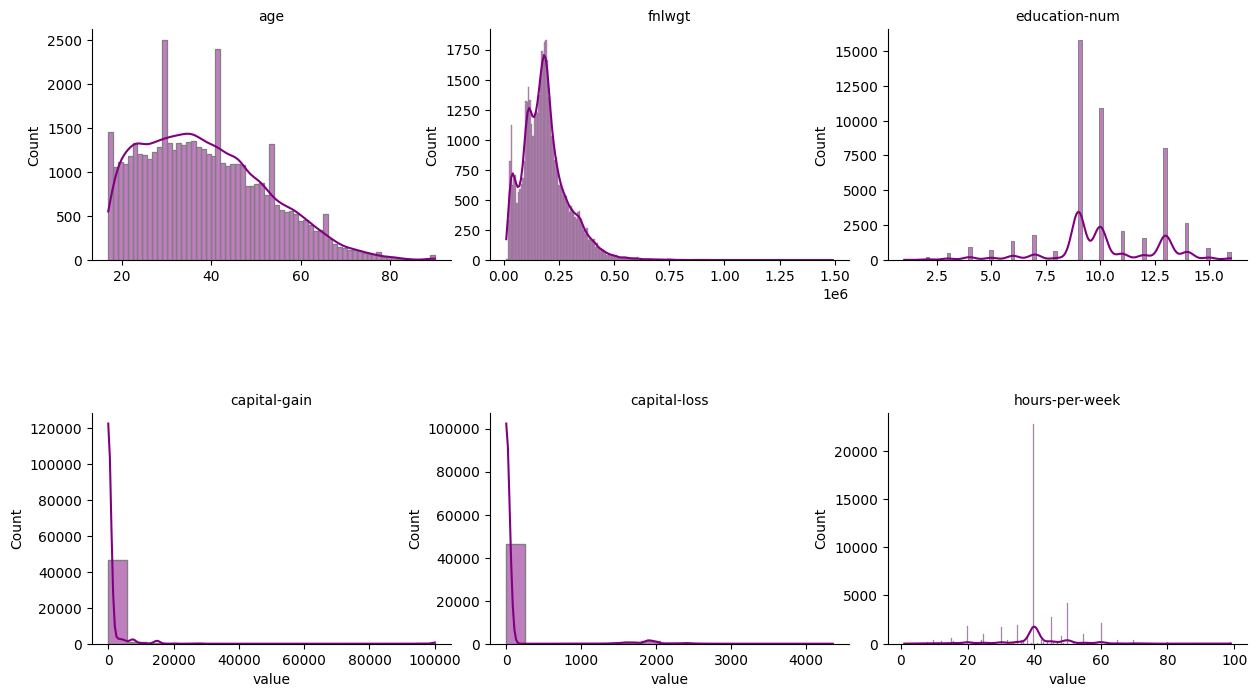

In [345]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="purple", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

d:\Repositories\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


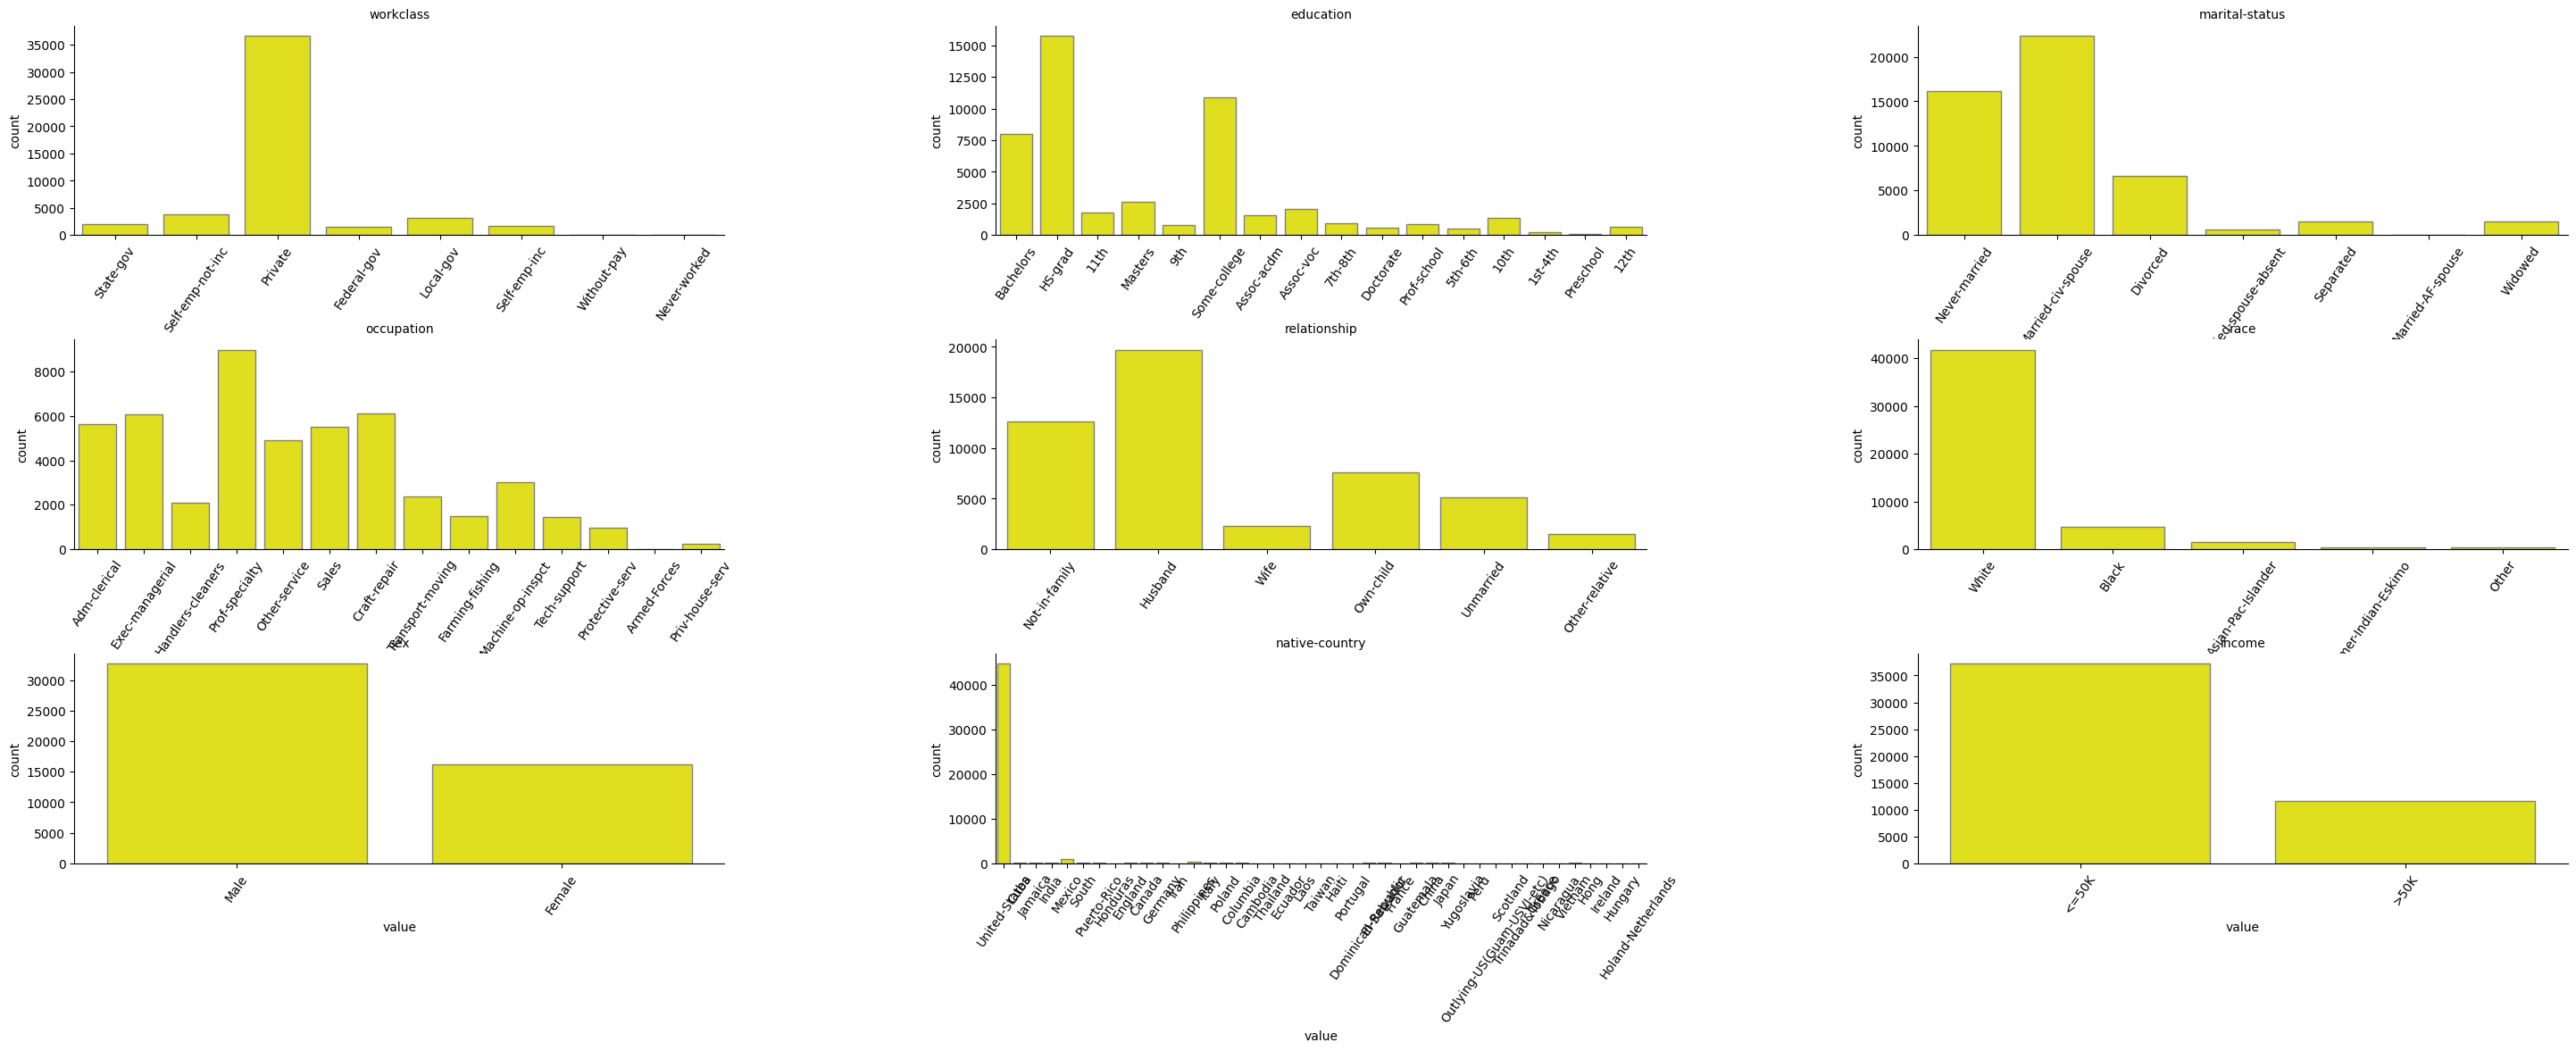

In [346]:
df_melt_cat = categorical_cols.melt()
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=3, height=5, sharex=False, sharey=False)
g.map(sns.countplot, "value", color="yellow", edgecolor="grey")
g.set_titles("{col_name}")
g.figure.set_size_inches(30,10)
g.set_xticklabels(rotation=55)
g.figure.subplots_adjust(hspace=0.5)  # Adjust the space between graphs
plt.show()

### 4. Bivariate Analysis

In [347]:
numerical_cols['income'] = df[['income']]
df_melt_num = numerical_cols.melt(id_vars=['income'])

d:\Repositories\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


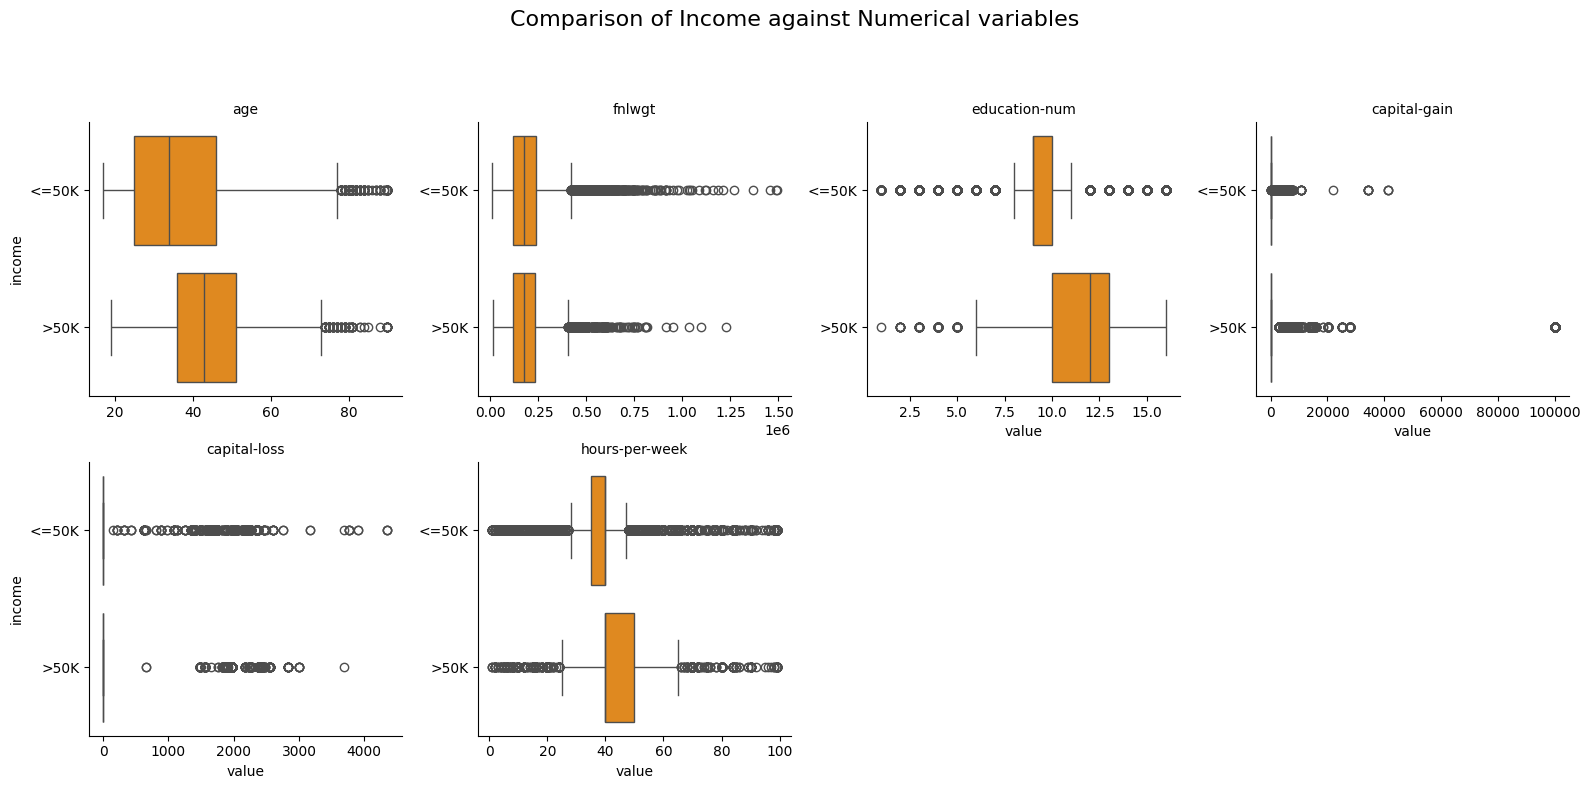

In [348]:
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.boxplot,"value",'income', color="darkorange")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84) 
g.figure.suptitle("Comparison of Income against Numerical variables", fontsize=16)
plt.show()

In [349]:
categorical_cols['income'] = df[['income']]
df_melt_cat = categorical_cols.melt(id_vars=['income'])

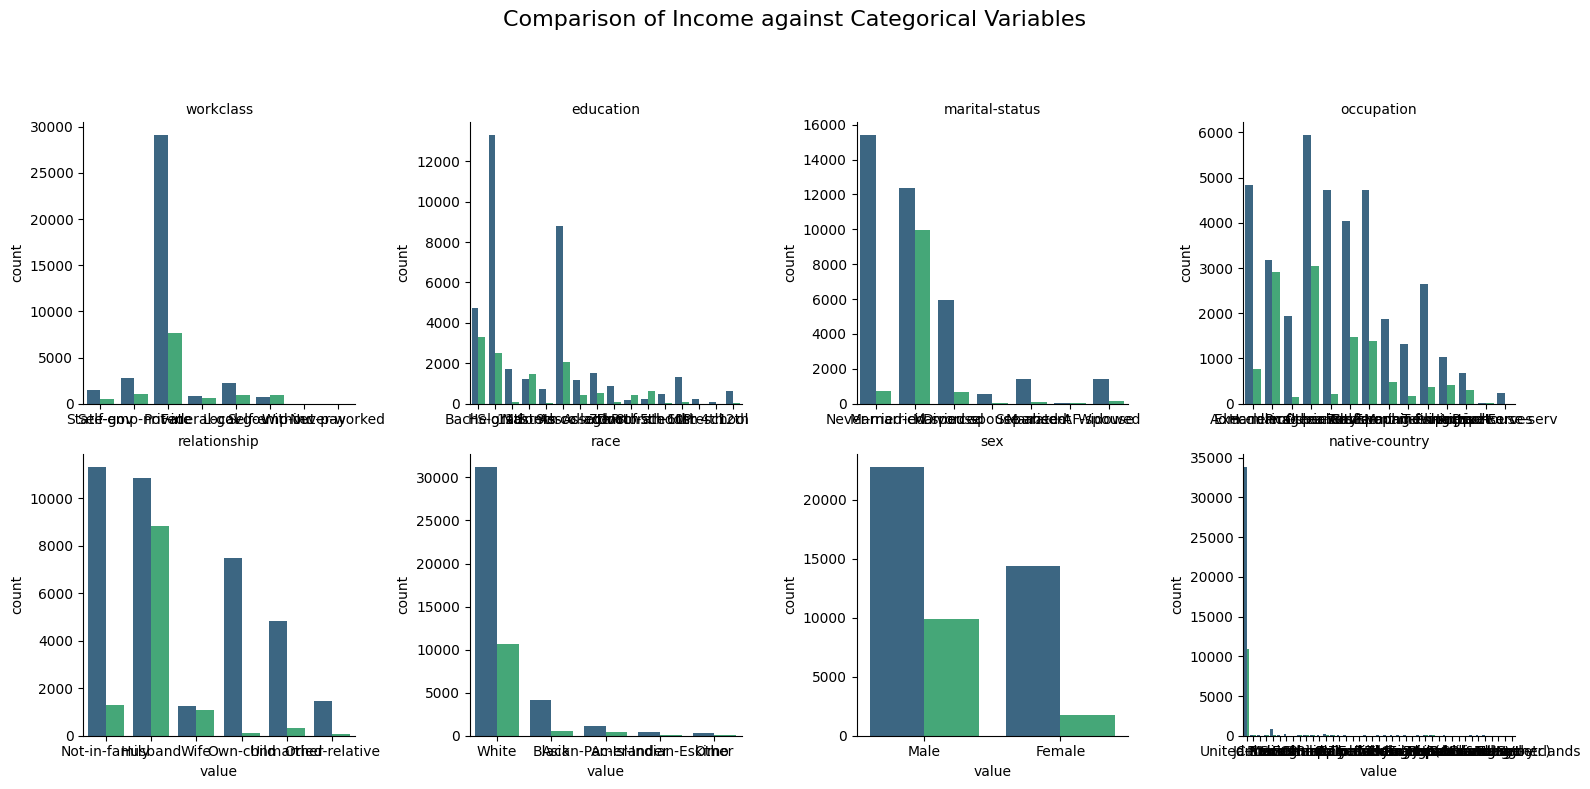

In [350]:
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="value", hue="income",palette='viridis')  
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84)
g.figure.suptitle("Comparison of Income against Categorical Variables", fontsize=16)

plt.show()

### Feature Engineering

In [351]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [352]:
df['education_level'] = df['education'].map({
    'Preschool': 'Basic',
    '1st-4th': 'Basic',
    '5th-6th': 'Basic',
    '7th-8th': 'Basic',
    '9th': 'High School',
    '10th': 'High School',
    '11th': 'High School',
    '12th': 'High School',
    'HS-grad': 'High School',
    'Some-college': 'College',
    'Bachelors': 'Graduate',
    'Masters': 'Post-graduate',
    'Doctorate': 'Post-graduate'
})

In [356]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']

In [358]:
df['sector'] = df['workclass'].map({
    'Private': 'Private',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-not-inc': 'Self_Employed',
    'Self-emp-inc': 'Self_Employed',
    'Without-pay': 'Other',
    'Never-worked': 'Other'
})

In [360]:
df['capital_per_hour'] = df['net_capital'] / df['hours-per-week']

### 5. Data Preprocessing

quick overview of categorical:


In [ ]:
for col in categorical_cols.columns:
   print('-'*10)
   print(col)
   print(categorical_cols[col].unique())

----------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
----------
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
----------
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
----------
sex
['Male' 'Female']
----------
native-country
['United-States' 'Cuba' 'Jam

only education is ordinal

#### Process Ordinal Data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']
]
encoder = OrdinalEncoder(categories=education_order)
df['education'] = encoder.fit_transform(df[['education']])

In [ ]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['race']]).toarray()


race_encoded = pd.DataFrame(race_encoded, columns=ohe.get_feature_names_out(['race']))
race_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, race_encoded], axis=1)
df.drop(columns=['race'],inplace=True)

In [ ]:
ohe = OneHotEncoder()
relationship_encoded = ohe.fit_transform(df[['relationship']]).toarray()


relationship_encoded = pd.DataFrame(relationship_encoded, columns=ohe.get_feature_names_out(['relationship']))
relationship_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, relationship_encoded], axis=1)
df.drop(columns=['relationship'],inplace=True)

In [ ]:
from sklearn.preprocessing import TargetEncoder
target_cols = ['native-country','workclass','occupation','marital-status']
encoder = TargetEncoder()
for col in target_cols:
    df[col] = encoder.fit_transform(df[[col]], df['income'])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,0.271132,77516,12.0,13,0.045243,0.136429,0,2174,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,0.278525,83311,12.0,13,0.445919,0.482456,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,0.208716,215646,8.0,9,0.101746,0.063249,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,0.208992,234721,6.0,7,0.445484,0.069105,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,0.207454,338409,12.0,13,0.445484,0.339459,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0.208766,215419,12.0,13,0.101319,0.338870,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,64,0.208766,321403,8.0,9,0.077495,0.338870,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,38,0.208442,374983,12.0,13,0.445919,0.345269,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,44,0.208716,83891,12.0,13,0.100220,0.136429,0,5455,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
for col in df.columns:
   print('-'*10)
   print(col)
   print(df[col].unique())

----------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------
workclass
[0.27113169 0.27852468 0.20871584 0.20899231 0.20745376 0.20876637
 0.27878553 0.26445122 0.20844225 0.39690626 0.29126569 0.30352029
 0.3894954  0.26828832 0.39579923 0.3918944  0.55598104 0.55758825
 0.27730018 0.38370934 0.27972616 0.29680467 0.27995948 0.26584486
 0.5559782  0.54902702 0.26798314 0.29342696 0.29290919 0.54681988
 0.0705128  0.         0.12159473 0.06598654 0.10881617]
----------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
----------
education
[12.  8.  6. 13.  4.  9. 10. 11.  3. 14. 15.  2.  5.  1.  0.  7.]
----------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------
marital-status
[0.04524296 0.44591894 0.10174624 0.44548359 0.09086246 0.44538365
 0.04647204 0.44717913 0

#### Numerical Variables

In [ ]:
for col in numerical_cols.drop(columns=['income']).columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : 1.44
education-num skewness : -0.32
capital-gain skewness : 11.89
capital-loss skewness : 4.57
hours-per-week skewness : 0.24


In [ ]:
def log_transform(x):
    return np.log(x + 1)

df['fnlwgt'] = log_transform(df['fnlwgt'])
df['capital-loss'] = log_transform(df['capital-loss'])
df['capital-gain'] = log_transform(df['capital-gain'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in numerical_cols.drop(columns=['income']).columns:
    df[col] = scaler.fit_transform(df[[col]])


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.025996,0.271132,-1.148848,12.0,1.136512,0.045243,0.136429,0,2.844559,-0.221264,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.828308,0.278525,-1.034558,12.0,1.136512,0.445919,0.482456,0,-0.297918,-0.221264,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.046942,0.208716,0.473105,8.0,-0.419335,0.101746,0.063249,0,-0.297918,-0.221264,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.047121,0.208992,0.607471,6.0,-1.197259,0.445484,0.069105,0,-0.297918,-0.221264,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.776316,0.207454,1.187449,12.0,1.136512,0.445484,0.339459,1,-0.297918,-0.221264,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,0.208766,0.471436,12.0,1.136512,0.101319,0.338870,1,-0.297918,-0.221264,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,1.849433,0.208766,1.105714,8.0,-0.419335,0.077495,0.338870,0,-0.297918,-0.221264,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,-0.046942,0.208442,1.350137,12.0,1.136512,0.445919,0.345269,0,-0.297918,-0.221264,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,0.390683,0.208716,-1.023560,12.0,1.136512,0.100220,0.136429,0,3.220639,-0.221264,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
for col in numerical_cols.drop(columns=['income']).columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : -0.84
education-num skewness : -0.32
capital-gain skewness : 3.11
capital-loss skewness : 4.30
hours-per-week skewness : 0.24


#### Feature Selection

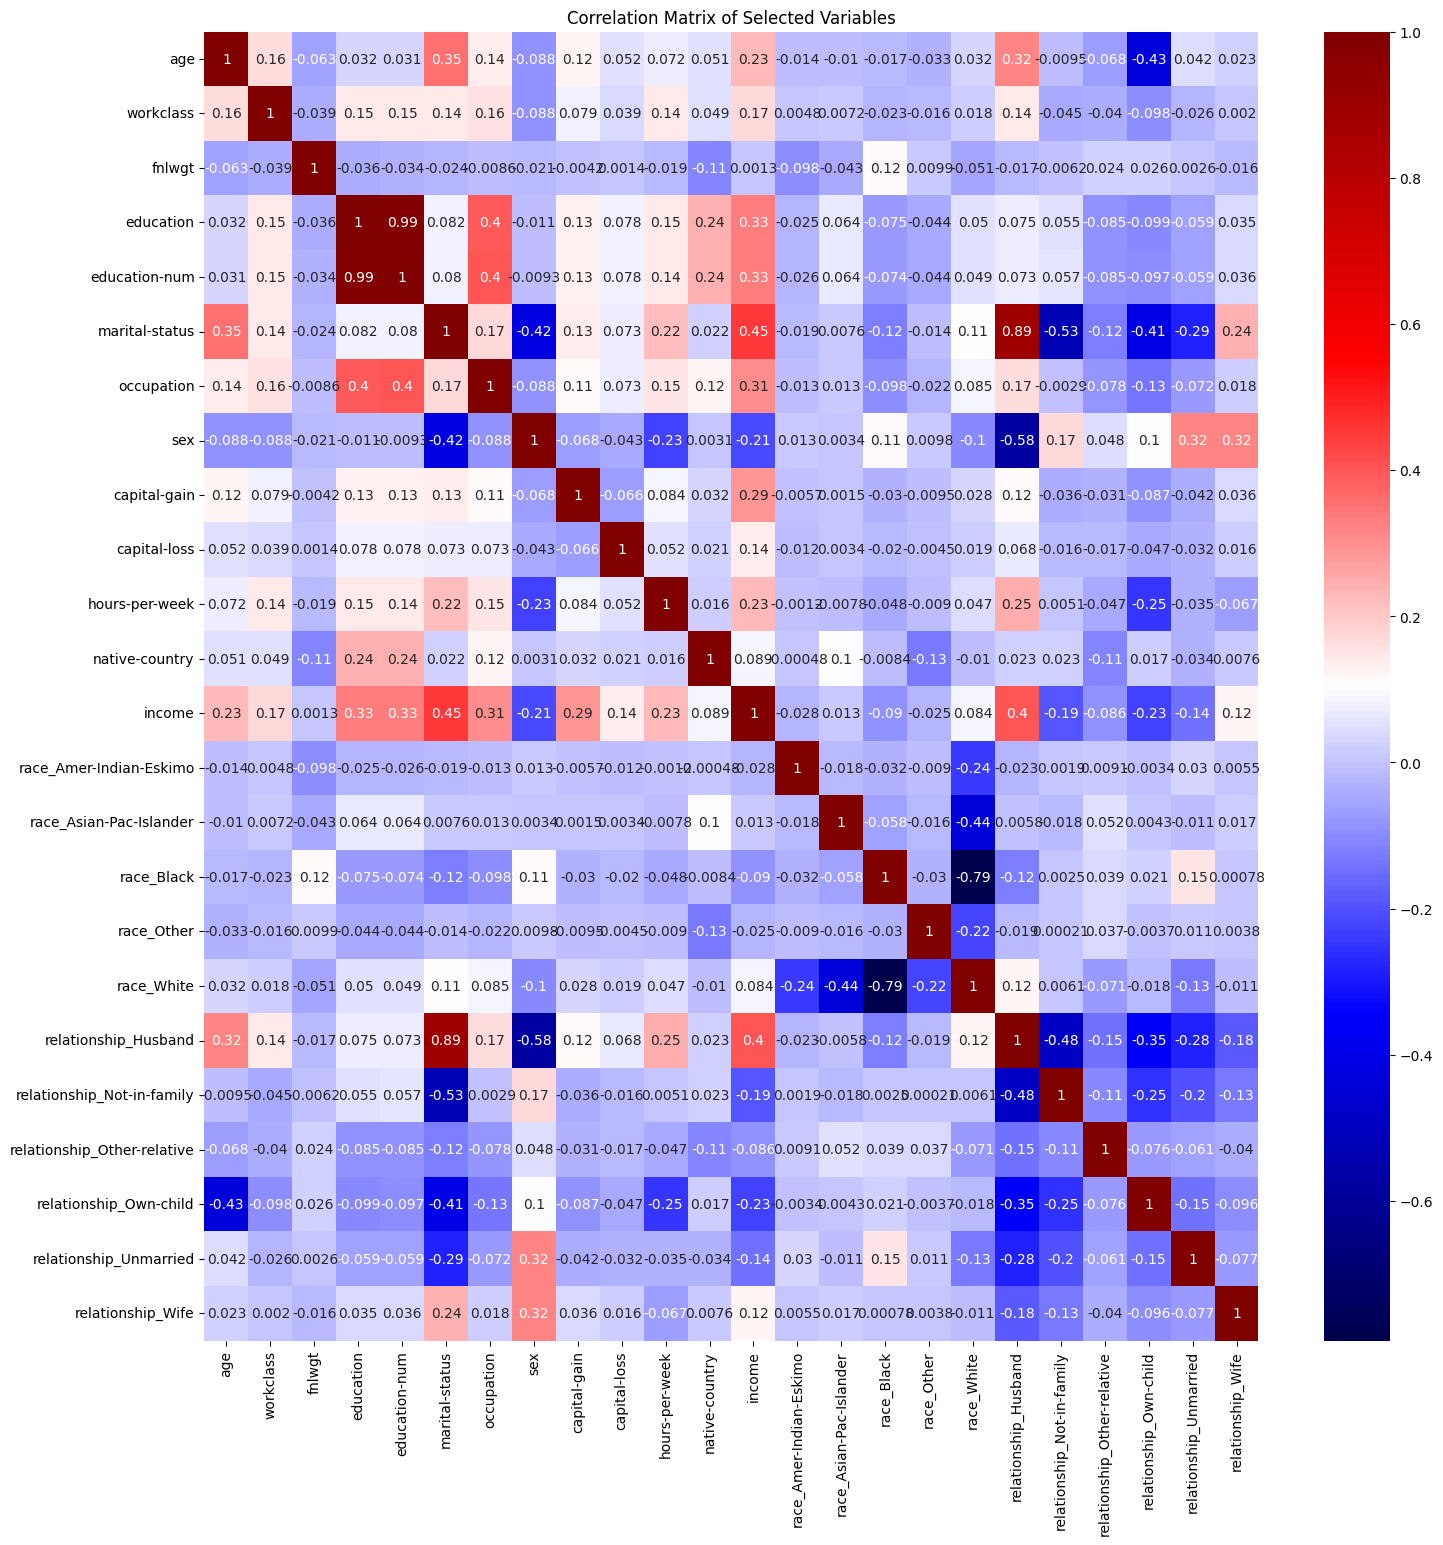

In [ ]:
plt.figure(figsize=(17,17))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

Text(0.5, 1.0, 'Correlation to Income')

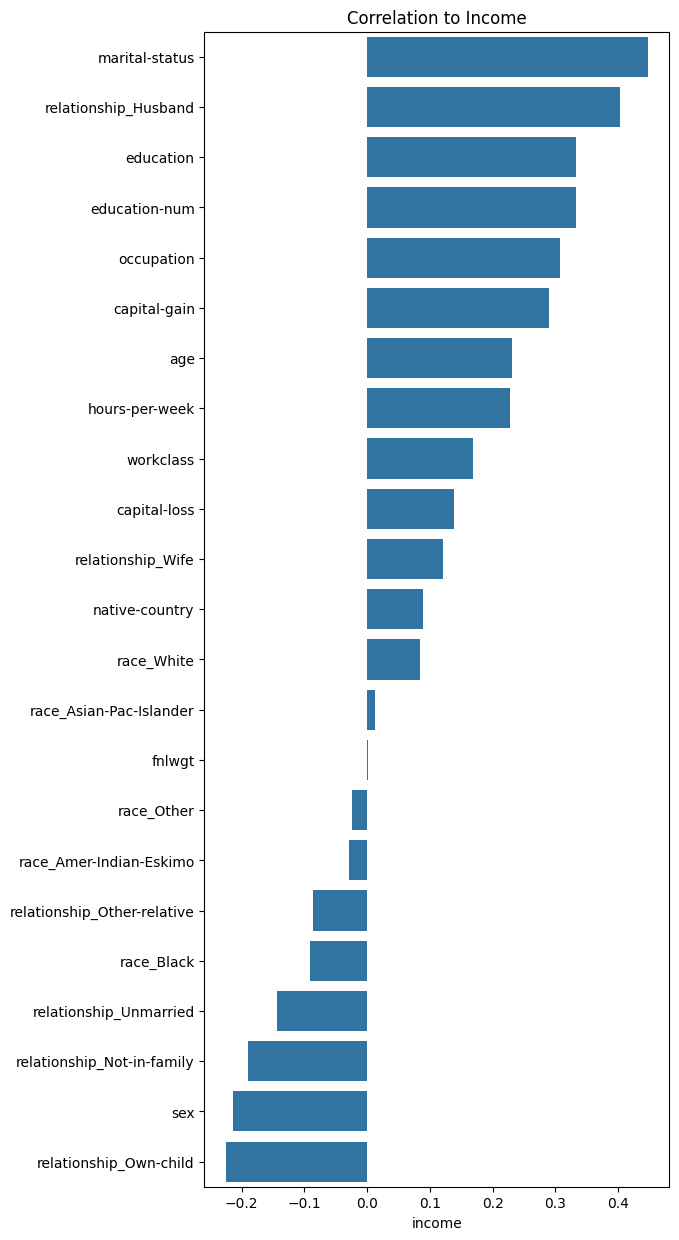

In [ ]:
plt.figure(figsize=(6,15))
sns.barplot(df.corr()['income'].drop('income').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to Income')


In [ ]:
col_to_drop = []
for col, v in df.corr()['income'].items():
    if -0.2 < v < 0.2:
        col_to_drop.append(col)
        print(col)


workclass
fnlwgt
capital-loss
native-country
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
relationship_Not-in-family
relationship_Other-relative
relationship_Unmarried
relationship_Wife


In [ ]:
df.drop(columns=col_to_drop,inplace=True)

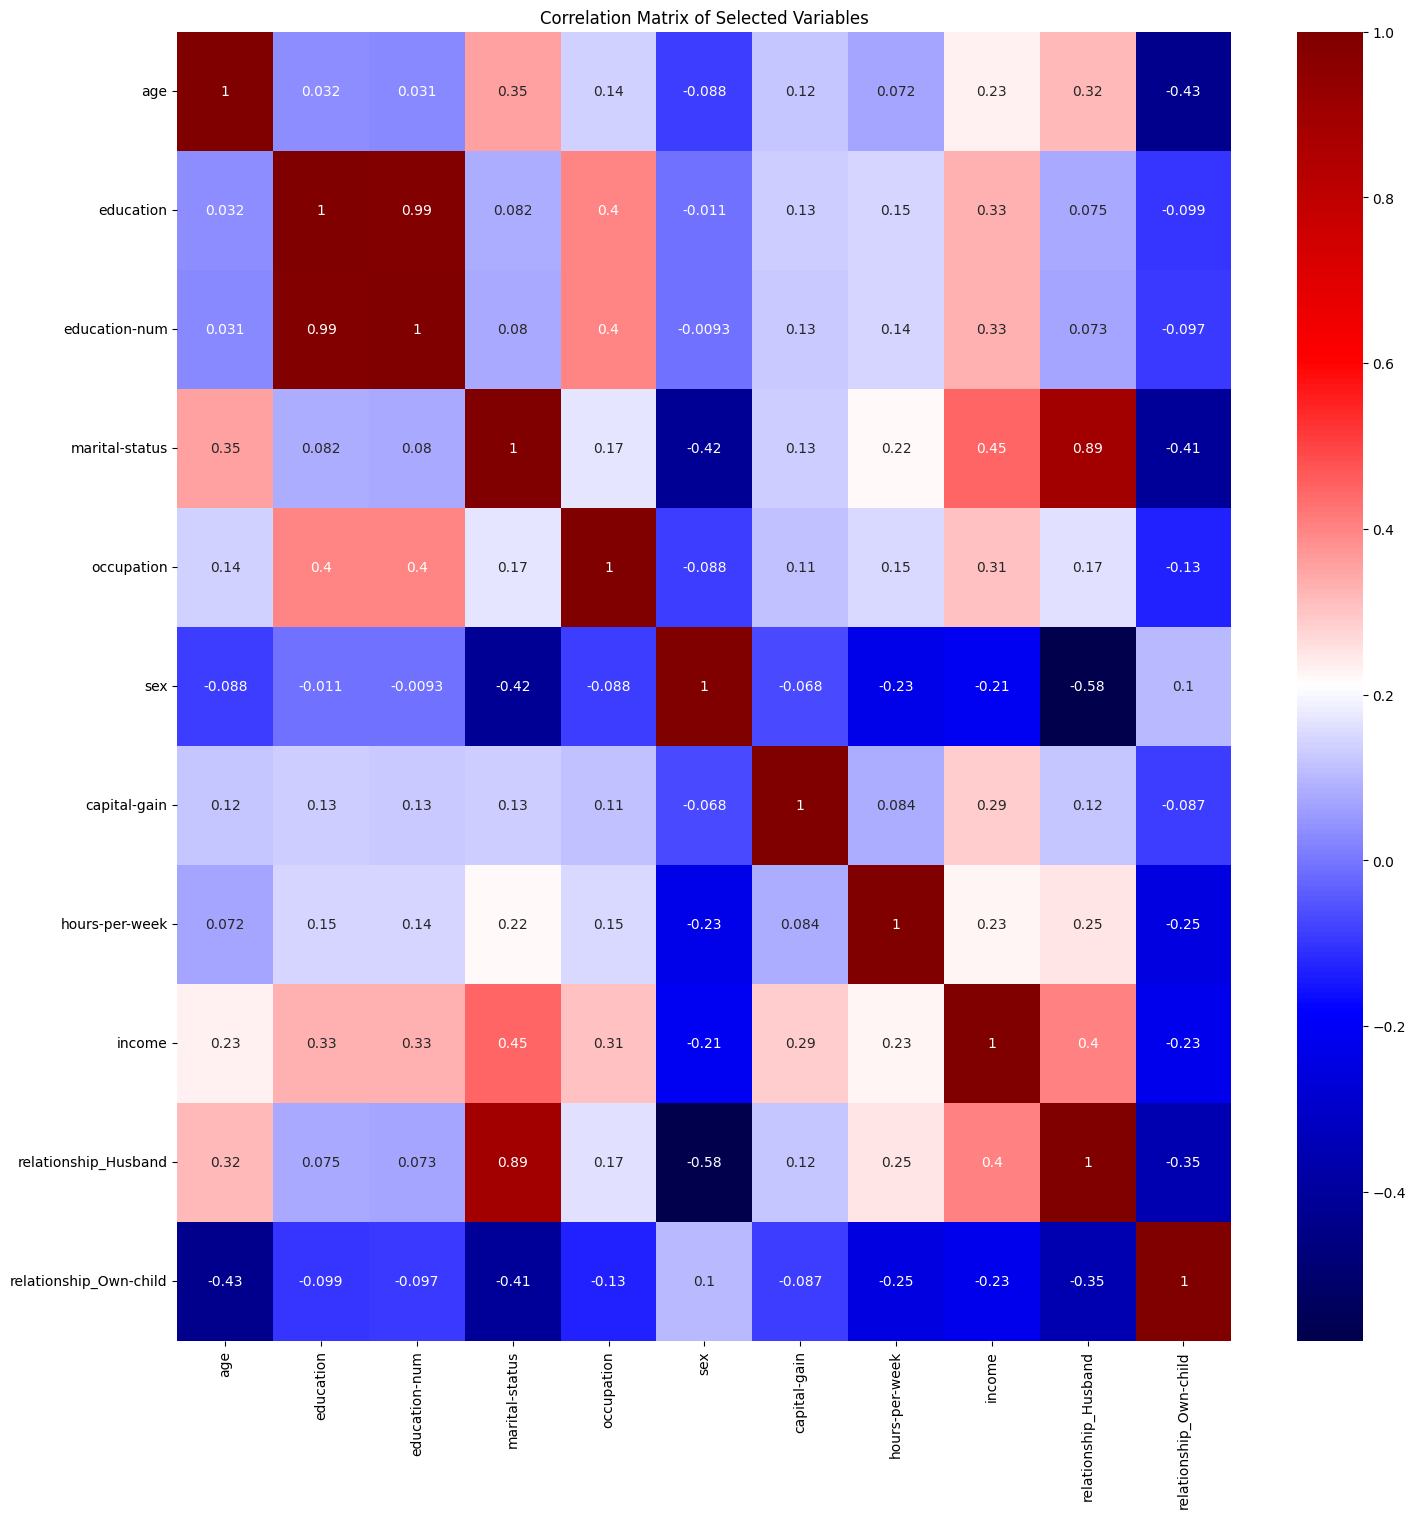

In [ ]:
plt.figure(figsize=(17,17))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()